In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [12]:
data = pd.read_csv('/content/crime_data.csv')

In [13]:
data.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [15]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
data1 = pd.DataFrame(trans.fit_transform(data.iloc[:,1:]))

In [16]:
data1.head(10)

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [17]:
WCSS = []

for i in range(1,11):
  a = KMeans(n_clusters=i)
  a.fit(data1)
  WCSS.append(a.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

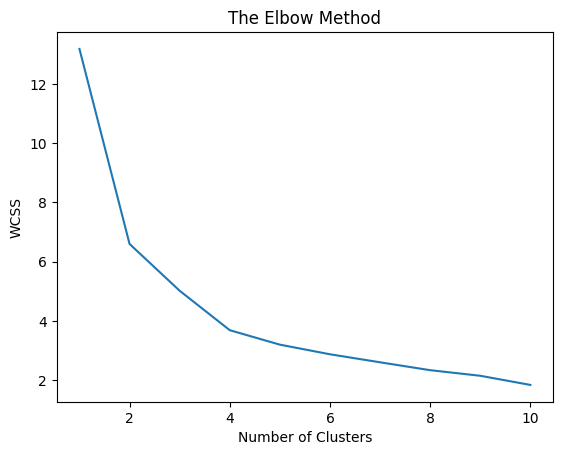

In [18]:
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [20]:
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(data1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
clf.labels_

array([1, 2, 2, 0, 2, 2, 4, 0, 2, 1, 4, 3, 2, 0, 3, 0, 0, 1, 3, 2, 4, 2,
       4, 1, 0, 0, 0, 2, 3, 4, 2, 2, 1, 3, 4, 0, 0, 4, 4, 1, 3, 1, 2, 4,
       3, 0, 4, 3, 3, 0], dtype=int32)

In [22]:
y_kmeans

array([1, 2, 2, 0, 2, 2, 4, 0, 2, 1, 4, 3, 2, 0, 3, 0, 0, 1, 3, 2, 4, 2,
       4, 1, 0, 0, 0, 2, 3, 4, 2, 2, 1, 3, 4, 0, 0, 4, 4, 1, 3, 1, 2, 4,
       3, 0, 4, 3, 3, 0], dtype=int32)

In [23]:
clf.cluster_centers_

array([[0.37198795, 0.35416667, 0.51412429, 0.32235142],
       [0.83562823, 0.70645793, 0.37772397, 0.37172388],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.11311914, 0.08523592, 0.29378531, 0.08182601],
       [0.23674699, 0.25719178, 0.79152542, 0.26356589]])

In [24]:
clf.inertia_

3.2027434506069077

In [25]:
b=pd.Series(y_kmeans)
data['clust']=b
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,4
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,1


In [26]:
data.iloc[:,1:5].groupby(data.clust).mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,6.975000,148.416667,62.333333,19.775000
1,14.671429,251.285714,54.285714,21.685714
2,10.966667,264.000000,76.500000,33.608333
3,2.677778,69.888889,49.333333,10.466667
4,4.730000,120.100000,78.700000,17.500000


Text(0.5, 1.0, 'Clusters using KMeans')

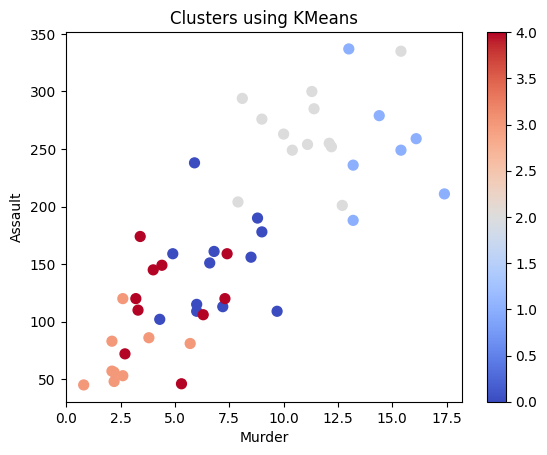

In [27]:
data.plot(x="Murder",y ="Assault",c=clf.labels_,kind="scatter",s=50 ,cmap=plt.cm.coolwarm)
plt.title('Clusters using KMeans')

In [52]:
WCSS

array([[13.18412255,  6.59689387,  5.01638892,  3.68345615,  3.19536034,
         2.87000068,  2.59932677,  2.33273334,  2.14385231,  1.83491804]])

In [53]:
from sklearn.metrics import silhouette_score

In [57]:
silhouette_score(data1, y_kmeans)

0.29788550549315185